**Project**



In [124]:
import pandas as pd #import pandas

In [125]:

movie_rev_data = pd.read_csv("/content/drive/MyDrive/movie_data.csv")

for line in movie_rev_data:
    line=line.replace("\n","")+" "

pd.set_option('display.max.colwidth', 120) #The display width is extended to 120 for beter feel. 
movie_rev_data.head(5)

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Grace) moves to the high-class area of Belle Haven, Greenwich, Connectic...",1
1,OK... so... I really like Kris Kristofferson and his usual easy going delivery of lines in his movies. Age has helpe...,0
2,"***SPOILER*** Do not read this, if you think about watching that movie, although it would be a waste of time. (By th...",0
3,hi for all the people who have seen this wonderful movie im sure thet you would have liked it as much as i. i love t...,1
4,"I recently bought the DVD, forgetting just how much I hated the movie version of ""A Chorus Line."" Every change the d...",0


In [126]:
print(movie_rev_data['review']) #The reviow column

0        In 1974, the teenager Martha Moxley (Maggie Grace) moves to the high-class area of Belle Haven, Greenwich, Connectic...
1        OK... so... I really like Kris Kristofferson and his usual easy going delivery of lines in his movies. Age has helpe...
2        ***SPOILER*** Do not read this, if you think about watching that movie, although it would be a waste of time. (By th...
3        hi for all the people who have seen this wonderful movie im sure thet you would have liked it as much as i. i love t...
4        I recently bought the DVD, forgetting just how much I hated the movie version of "A Chorus Line." Every change the d...
                                                                  ...                                                           
49995    OK, lets start with the best. the building. although hard to believe it had electricity and running water after 35 y...
49996    The British 'heritage film' industry is out of control. There's nothing wrong with filmi

* Packages and libraries 

In [127]:

import nltk
import re
import string
import re
import gensim
import itertools

nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
from gensim.corpora.dictionary import Dictionary
from collections import defaultdict
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


*Punctuation Remived 

In [128]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [129]:

def remove_punctuation (reviewtxt):
  reviewtxt_punct ="".join([w for w in reviewtxt if w not in string.punctuation])
  return reviewtxt_punct



In [130]:
movie_rev_data['review_nopunt'] = movie_rev_data['review'].apply(lambda doc: remove_punctuation(doc))

movie_rev_data['review_nopunt']

0        In 1974 the teenager Martha Moxley Maggie Grace moves to the highclass area of Belle Haven Greenwich Connecticut On ...
1        OK so I really like Kris Kristofferson and his usual easy going delivery of lines in his movies Age has helped him w...
2        SPOILER Do not read this if you think about watching that movie although it would be a waste of time By the way The ...
3        hi for all the people who have seen this wonderful movie im sure thet you would have liked it as much as i i love th...
4        I recently bought the DVD forgetting just how much I hated the movie version of A Chorus Line Every change the direc...
                                                                  ...                                                           
49995    OK lets start with the best the building although hard to believe it had electricity and running water after 35 year...
49996    The British heritage film industry is out of control Theres nothing wrong with filming c

Tokenization and lowring the upper cases 

In [131]:
#Word tokenized and lowerind upper cases

from nltk.tokenize import word_tokenize

movie_rev_data['words_tokenized'] =[word_tokenize(doc.lower())
                                   for doc in movie_rev_data['review_nopunt']]


In [132]:
 movie_rev_data['words_tokenized']

0        [in, 1974, the, teenager, martha, moxley, maggie, grace, moves, to, the, highclass, area, of, belle, haven, greenwic...
1        [ok, so, i, really, like, kris, kristofferson, and, his, usual, easy, going, delivery, of, lines, in, his, movies, a...
2        [spoiler, do, not, read, this, if, you, think, about, watching, that, movie, although, it, would, be, a, waste, of, ...
3        [hi, for, all, the, people, who, have, seen, this, wonderful, movie, im, sure, thet, you, would, have, liked, it, as...
4        [i, recently, bought, the, dvd, forgetting, just, how, much, i, hated, the, movie, version, of, a, chorus, line, eve...
                                                                  ...                                                           
49995    [ok, lets, start, with, the, best, the, building, although, hard, to, believe, it, had, electricity, and, running, w...
49996    [the, british, heritage, film, industry, is, out, of, control, theres, nothing, wrong, w

* Stopwords removing 

In [133]:
from nltk.corpus import stopwords

stopwords.words('english')
stop_words1 = set(stopwords.words('english')) #The NLTK stopwords are used for removing stopwords. 
stop_words1

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [134]:
from nltk.corpus import stopwords


def stopwords_removed (txtdata):
  clen_data = [s for s in txtdata if s not in stop_words1]
  return clen_data 
movie_rev_data['no_stopwrd_word_tokenized'] = movie_rev_data['words_tokenized'].apply(lambda doc: stopwords_removed(doc))

In [135]:
movie_rev_data['no_stopwrd_word_tokenized']

0        [1974, teenager, martha, moxley, maggie, grace, moves, highclass, area, belle, greenwich, connecticut, mischief, nig...
1        [ok, really, like, kris, kristofferson, usual, easy, going, delivery, lines, movies, age, helped, soft, spoken, low,...
2        [spoiler, read, think, watching, movie, although, would, waste, time, way, plot, predictable, make, difference, read...
3        [hi, people, seen, wonderful, movie, im, sure, thet, would, liked, much, love, songs, seen, show, sing, along, thoug...
4        [recently, bought, dvd, forgetting, much, hated, movie, version, chorus, line, every, change, director, attenborough...
                                                                  ...                                                           
49995    [ok, lets, start, best, building, although, hard, believe, electricity, running, water, 35, years, fire, gruesome, w...
49996    [british, heritage, film, industry, control, theres, nothing, wrong, filming, classic, n

In [136]:
tokenized_clean_data = movie_rev_data['no_stopwrd_word_tokenized'] # the tokenized data assigned to the new dataframe


Vectorization tokenised words using Gensin Dictionary 

In [137]:
#Vectorising after stop words have been removed 

from gensim.corpora.dictionary import Dictionary

Dictionary = Dictionary(tokenized_clean_data)
Dictionary.token2id

{'1974': 0,
 '70s': 1,
 'able': 2,
 'andrew': 3,
 'area': 4,
 'available': 5,
 'backyard': 6,
 'belle': 7,
 'book': 8,
 'br': 9,
 'brazil': 10,
 'carroll': 11,
 'case': 12,
 'charge': 13,
 'christopher': 14,
 'committed': 15,
 'connecticut': 16,
 'convicted': 17,
 'cover': 18,
 'crime': 19,
 'criminal': 20,
 'days': 21,
 'decides': 22,
 'detective': 23,
 'disclose': 24,
 'discover': 25,
 'disgrace': 26,
 'dramatization': 27,
 'emotion': 28,
 'eve': 29,
 'fallen': 30,
 'family': 31,
 'fifteen': 32,
 'former': 33,
 'forster': 34,
 'fuhrman': 35,
 'girl': 36,
 'good': 37,
 'grace': 38,
 'greenwich': 39,
 'halloween': 40,
 'hideous': 41,
 'highclass': 42,
 'house': 43,
 'however': 44,
 'idaho': 45,
 'influence': 46,
 'investigate': 47,
 'investigation': 48,
 'kennedy': 49,
 'la': 50,
 'lack': 51,
 'last': 52,
 'later': 53,
 'locals': 54,
 'maggie': 55,
 'mark': 56,
 'martha': 57,
 'meloni': 58,
 'mischief': 59,
 'mitchell': 60,
 'money': 61,
 'mother': 62,
 'moved': 63,
 'moves': 64,
 'mov

In [138]:
interesting_id = Dictionary.token2id.get('interesting') # after removing punctions and stopwords, the id of the word interesting is now 796.
print(interesting_id)

796


In [139]:
print(len(tokenized_clean_data[0])) # lenth of list 0.


128


In [140]:
corpus_bow = [Dictionary.doc2bow(movie, allow_update=True) for movie in tokenized_clean_data] #Convert document into list of (token_id, token_count) 
print(corpus_bow[3])

[(65, 1), (161, 1), (189, 2), (199, 1), (206, 1), (207, 1), (273, 1), (275, 2), (297, 2), (326, 1), (327, 2), (328, 1), (329, 1), (330, 1), (331, 1), (332, 1), (333, 1), (334, 1), (335, 1), (336, 1), (337, 1), (338, 2), (339, 1), (340, 2), (341, 1), (342, 1), (343, 1), (344, 1), (345, 1), (346, 1)]


In [141]:
#for movie in corpus_bow:
   #print([[Dictionary[id], freq] for id, freq in movie])

In [142]:
print(Dictionary.get(87))

shows


In [143]:
import numpy as np


In [144]:
# Commented out !!! Too big data !!!!!
#from gensim.models.tfidfmodel import TfidfModel
#tfidf = TfidfModel(corpus_bow)

#for movie in tfidf[corpus_bow]:
 #  print([[Dictionary[id], np.around(freq)] for id, freq in movie])

* Words Frequencies 

In [145]:
# Frequencies of words by top mot accured by individual lists of document.
from collections import defaultdict 
# Shortted by top most words frequency 

textdoc = corpus_bow[2] # text = [Dictionary.doc2bow(movie) for movie in tokenized_clean_data]
short_doc = sorted(textdoc, key=lambda w: w[1], reverse=True)

print("the most 10 frequent words in doc 3")
for word_id, word_count in short_doc[:10]:
    print(Dictionary.get(word_id), word_count)



the most 10 frequent words in doc 3
br 4
movie 4
good 2
plot 2
bruckheimer 2
coyote 2
funny 2
looking 2
one 2
read 2


In [146]:
#totaldocs (int) – Total number of documents.

from collections import defaultdict

word_counts = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus_bow):
    word_counts[word_id] += word_count

decent_word_count = sorted(word_counts.items(), key=lambda w: w[1], reverse=True) 

print("the most 10 frequent words")

for word_id, word_count in decent_word_count[:10]:
    print(Dictionary.get(word_id), word_count)

the most 10 frequent words
br 113797
movie 83511
film 74459
one 51027
like 38989
good 28569
even 24572
would 24024
time 23258
really 22948


TF-IDF

In [147]:
#Topoc Modeling

from gensim.models.tfidfmodel import TfidfModel
tfidf = TfidfModel(corpus_bow)
tfidfdoc = tfidf[corpus_bow[2]]
tfidf_doc = sorted(tfidfdoc, key=lambda w: w[1], reverse=True)

print("10 most weighted words in doc 3")
for word_id, word_count in tfidf_doc[:15]:
    print(Dictionary.get(word_id), word_count) 

10 most weighted words in doc 3
bruckheimer 0.27268733548432106
coyote 0.2542493771311766
chickfeelgoodflick 0.19794857142908032
selfironic 0.18526739714109774
violets 0.17784938571751863
shallow 0.17326449087217718
jerseys 0.16850379657365033
ugly 0.162571846063754
uncritical 0.15248703714155346
perabo 0.15102265042116
mcnally 0.14224882866268038
arouse 0.14058449386183394
astonished 0.12463414128035306
goodman 0.12048530815027222
piper 0.11895983600665862


* Splited the data into training and test by an equal size. 

In [148]:
#For predictions models 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

In [149]:
movie_rev_data.shape #The shape of the data

(50000, 5)

In [150]:
movie_rev_data.isnull().sum() #Checking the if there are missing values

review                       0
sentiment                    0
review_nopunt                0
words_tokenized              0
no_stopwrd_word_tokenized    0
dtype: int64

In [151]:
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


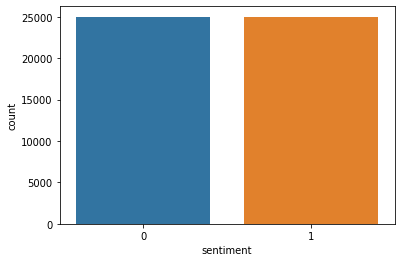

In [152]:
sns.countplot(movie_rev_data['sentiment']) # Negative and positive sentiment values in the data 

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
x_Train, x_Test, y_Train, y_Test = train_test_split(movie_rev_data['review'],
                                                    movie_rev_data['sentiment'],
                                                    test_size=0.50) # splited the data into two equal sizes 

In [155]:
len(x_Train)
len(x_Test)
len(y_Train)
len(y_Test)

25000

In [156]:
print(x_Train) # x trainog data

32633    A Walt Disney MICKEY MOUSE Cartoon.<br /><br />STEAMBOAT WILLIE, a mischievous little rodent, neglects his pilothous...
9357     If you make a suspense movie it is kind of important that the "villain" not be more sympathetic than the "victim". A...
20599    This has to be some of the worst direction I've seen. The close-up can be a very powerful shot, but when every scene...
45963    REnted this one accidentally, it was behind the movie box of what i thought i was renting, didn't find out until i g...
20748    I thought this series was going to be another fun, action series with some dynamic plots and great performances. I w...
                                                                  ...                                                           
7231     I never saw this movie until I bought the tape last year. I was enthralled and entertained. It has all the elements ...
1776     This one and "Her Pilgrim Soul" are two of my favorite episodes in this new version of T

In [157]:
print(y_Train) # y training data 

32633    1
9357     0
20599    0
45963    1
20748    0
        ..
7231     1
1776     1
3656     0
21362    1
16316    1
Name: sentiment, Length: 25000, dtype: int64


* TF-TDF Vctorization on the X trainig data 

In [158]:
from sklearn.feature_extraction.text import TfidfVectorizer 
vect = TfidfVectorizer().fit(x_Train)

In [159]:
len(vect.get_feature_names())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


76695

In [160]:
vectorized_x_train = vect.transform(x_Train)

In [161]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(vectorized_x_train, y_Train)


LogisticRegression()

In [162]:
predicted = model.predict(vect.transform(x_Test))

In [163]:
print(predicted)

[1 1 1 ... 0 0 1]


In [164]:
from sklearn.metrics import roc_auc_score
print("AUC:", roc_auc_score(y_Test, predicted)) # The predicted model is 0.90% accurate.

AUC: 0.8877639361357482
